MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/shwetakumari/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shwetakumari/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shwetakumari/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/shwetakumari/opt/anaconda3/lib/python3.7/s

In [2]:
import pandas as pd
training_d=pd.read_csv('train_mnist.csv')
testing_d=pd.read_csv('test_mnist.csv')
training_d.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
labels=pd.get_dummies(training_d.label) #to convert into one hot encoded
training_d.drop('label',inplace=True,axis=1)
training_d.shape,testing_d.shape,labels.shape

((42000, 784), (28000, 784), (42000, 10))

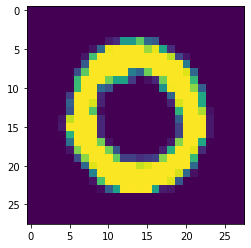

In [4]:
###plot image
image=training_d.iloc[1]
image=np.array(image,dtype='float')
image=image.reshape((28,28))
plt.imshow(image)
plt.show()

# USING TENSORFLOW

In [ ]:
n_input=784
n_hidden1=512
n_hidden2=256
n_classes=10
epsilon=1e-3
weights={'h1':tf.Variable(tf.random_normal([n_input,n_hidden1])),
         'h2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
        'out':tf.Variable(tf.random_normal([n_hidden2,n_classes]))}
biases={'h1':tf.Variable(tf.random_normal([n_hidden1])),
         'h2':tf.Variable(tf.random_normal([n_hidden2])),
        'out':tf.Variable(tf.random_normal([n_classes]))}

###forward propagation
def forward_propagation(x,weights,biases):
    ###w^t*x+b
    in_layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    ###batch normalization
    batch_mean_1,batch_var_1=tf.nn.moments(in_layer1,[0])
    scale_1=tf.Variable(tf.ones([n_hidden1]))
    beta_1=tf.Variable(tf.zeros([n_hidden1]))
    layer_1=tf.nn.batch_normalization(in_layer1,batch_mean_1,batch_var_1,beta_1,scale_1,epsilon)
    ###activation fn
    out_layer1=tf.nn.relu(layer_1)
    ###dropout layer
    out_layer1_drop=tf.nn.dropout(out_layer1,keep_prob)
    ###same for layer2
    in_layer2=tf.add(tf.matmul(out_layer1_drop,weights['h2']),biases['h2'])
    batch_mean_2,batch_var_2=tf.nn.moments(in_layer2,[0])
    scale_2=tf.Variable(tf.ones([n_hidden2]))
    beta_2=tf.Variable(tf.zeros([n_hidden2]))
    layer_2=tf.nn.batch_normalization(in_layer2,batch_mean_2,batch_var_2,beta_2,scale_2,epsilon)
    out_layer2=tf.nn.relu(in_layer2) 
    out_layer2_drop=tf.nn.dropout(out_layer2,keep_prob)
    ###output layer
    output=tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    return output

x=tf.placeholder('float',[None,n_input])
y=tf.placeholder('int32',[None,n_classes])
keep_prob=tf.placeholder('float32')
pred=forward_propagation(x,weights,biases)
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=y))
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

batch_size=100
for i in range(25): ###training epochs= 25
    num_batches=int(len(training_d)/batch_size)
    total_cost=0
    l=0
    for j in range(num_batches):
        batch_x=training_d[l:l+batch_size]
        batch_y=labels[l:l+batch_size]
        l+=batch_size
        c,opt=sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y,keep_prob: 0.5})
        total_cost+=c
    print(total_cost)
    #c,opt=sess.run([cost,optimize],feed_dict={x:training_d,y:labels})

predictions1=tf.argmax(pred,1)
predictions1=sess.run([predictions1],feed_dict={x:testing_d})

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
predictions1

In [ ]:
len(predictions1[0])

In [ ]:
id_=np.arange(1,len(testing_d)+1)
op = pd.DataFrame({'ImageId':id_, 'Label':predictions1[0]})
op.to_csv('kaggle_digit_recognizer.csv', index=False)

# USING CNN

In [ ]:
input_width=28
input_height=28
input_channels=1
input_pixels=784
n_conv1=32
n_conv2=64
conv1_k=5
conv2_k=5
n_hidden=1024
n_out=10
max_pool1_k=2
max_pool2_k=2
stride_conv1=1
stride_conv2=1
input_size_to_hidden=(input_width//(max_pool1_k*max_pool2_k)*(input_height//(max_pool1_k*max_pool2_k)))*n_conv2
weights={'wc1':tf.Variable(tf.random_normal([conv1_k,conv1_k,input_channels,n_conv1])),
         'wc2':tf.Variable(tf.random_normal([conv2_k,conv2_k,n_conv1,n_conv2])),
         'wh1':tf.Variable(tf.random_normal([input_size_to_hidden,n_hidden])),
         'wo':tf.Variable(tf.random_normal([n_hidden,n_out]))}
biases={'bc1':tf.Variable(tf.random_normal([n_conv1])),
        'bc2':tf.Variable(tf.random_normal([n_conv2])),
        'bh1':tf.Variable(tf.random_normal([n_hidden])),
        'bo':tf.Variable(tf.random_normal([n_out]))}

def cnn(x,weights,biases):
    x=tf.reshape(x,shape=[-1,input_height,input_width,input_channels])
    conv1=conv(x,weights['wc1'],biases['bc1'],stride_conv1)
    conv1_pool=maxpooling(conv1,max_pool1_k)
    conv2=conv(conv1_pool,weights['wc2'],biases['bc2'],stride_conv2)
    conv2_pool=maxpooling(conv2,max_pool2_k)
    hidden_input=tf.reshape(conv2_pool,shape=[-1,input_size_to_hidden])
    hidden_output_before_activation=tf.add(tf.matmul(hidden_input,weights['wh1']),biases['bh1'])
    hidden_output=tf.nn.relu(hidden_output_before_activation)
    output=tf.add(tf.matmul(hidden_output,weights['wo']),biases['bo'])
    return output

def conv(x,weights,biases,strides=1):
        out=tf.nn.conv2d(x,weights,padding='SAME',strides=[1,strides,strides,1])
        out=tf.nn.bias_add(out,biases)
        out=tf.nn.relu(out)
        return out

def maxpooling(x,k=2):
    return tf.nn.max_pool(x,padding='SAME',ksize=[1,k,k,1],strides=[1,k,k,1])

x=tf.placeholder('float',[None,input_pixels])
y=tf.placeholder('int32',[None,n_out])

pred=cnn(x,weights,biases) #forward propagation

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=y))

optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

batch_size=100
for i in range(25):
    num_batches=int(len(training_d)/batch_size)
    total_cost=0
    l=0
    for j in range(num_batches):
        batch_x=training_d[l:l+batch_size]
        batch_y=labels[l:l+batch_size]
        l+=batch_size
        c,opt=sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y})
        total_cost+=c
    print(total_cost)
    c,opt=sess.run([cost,optimize],feed_dict={x:training_d,y:labels})
    
predictions2=tf.argmax(pred,1)
predictions2=sess.run([predictions2],feed_dict={x:testing_d})

In [ ]:
predictions2

In [ ]:
id_=np.arange(1,len(testing_d)+1)
op = pd.DataFrame({'ImageId':id_, 'Label':predictions2[0]})
op.to_csv('kaggle_digit_recognizer.csv', index=False)

####96.4 % accuracy on kaggle